## Common ML Algorithms in One Notebook:
- The purpose of this All-in-one Notebook is to illustrate the modelling workflow of common ML techniques (Processing, Modeling, Predicting, Evaluating). The tuning is not focused. You are recommended to do further research on it.

**There are 2 main problems in ML:**

- Regressions: Predicting a quantity - For example: yearly_amount_spent
- Classification: Classify the observations into class (label) - For example: High-Value Users (one with yearly_amount_spent > q0.8)
#### Note: Though it might not show in this notebook: SVM, Boosting (XGBoost, GBM, LightGBM), Tree-based (Decision-Tree, Random Forest) => Can work on boht problems with Regressor and Classifier, respectively (Fore example, in this notebook XGBRegressor and XGBClassifier is shown.

**There are 3 main types of ML algorithms:**

- Supervised Learning: Have an observed label/target/outcome to be predicted from a set of predictors. We generate a functions to map inputs to the desired outputs (Linear Regressions, RF, XGBoost, etc). 

- Unsupervised Learning: No target, but we cluster the sample/population into different groups that within each group they are quite similar, but between groups they are different (K-means) (Read More: Clustering).
Clustering have 2 key purposes:
Analytics cluster: expland the knowledge and give more information about the data (customer segmentation)
Useful cluster: use as an intermediate step in a data pipeline

- Reinforcement Learning: model is trained to make specific decisions, exposed to the environment that it trains itself continually using trial-and-error (Markov Decision Process)

#### 📤 Import Libraries

In [1]:
## Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

💾 Data
We use Ecommerce Customer dataset, with Yearly Amount Spent is a continues variable, as a target variable (y) for our modelings. The data contains the following columns:

Email, Address, Avatar: customers metadata
Avg. Session Length, Time on App, Time on Website, Length of Membership: User behaviors on the Ecommerce platform

#### Importing the DataSet and Checking it

In [2]:
## Importing the DataSet and Viewing it
ecommerce_df = pd.read_csv(r"C:\Users\lenovo\Desktop\Ecommerce Customers.csv")
ecommerce_df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

🚧 Data Manipulation: Regex & Categorical

In [3]:
# Rename Cols for ease of manipulate

ecommerce_df.columns = [re.sub('[.\s]+', '_', c.lower()) for c in ecommerce_df.columns] #.str.lower() #.replace(r'[+]','_')

We believe that there are some interesting info in the email, address, avatar. For example:

Customer with company email might be more legit => Extract the email domain info
Different states might have different consumption behaviors
Avatar colors implies the genders and preferences
Note: Use Regex for this string manipulation

In [4]:
ecommerce_df['address'][0].splitlines()[1].split()

['Wrightmouth,', 'MI', '82180-9605']

In [5]:
ecommerce_df['state'] = ecommerce_df['address'].map(lambda x: x.splitlines()[1].split()[-2])

ecommerce_df['zip_code'] = ecommerce_df['address'].map(lambda x: x.splitlines()[1].split()[-1])

ecommerce_df['email_domain'] = ecommerce_df['email'].apply(lambda email: email[email.find("@")+1:].split('.')[0])

ecommerce_df['avatar_theme'] = [re.findall(r'[A-Z][^A-Z]*', a)[-1] for a in ecommerce_df.avatar] 

In [6]:
ecommerce_df.head()

email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             address            avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   yearly_amount_spent state    zip_code     email_domain avatar_theme  
0           587.951054    MI  82180-9605        fernandez       Violet  
1           392.204933    CA  06566-8576          hotmail        Green  
2           487.547505    DC  99414-7564            yahoo       Bisque  
3           581.852344    OH  22070-1220            gmail        Brown  
4           599.406092    PR  37242-1057  davidson-herman       Marine

See how useful this regex manipulation could help us:

Simplify the categories of avatar (remember if you have to many groups, it's clumsy for one-hot encoding to process the data for modeling)
For the distribution of categorical, we might change the way we bucketize the variables => In the way, that we simplify and reduce the buckets

<AxesSubplot:title={'center':'Distribution by Avatars'}>

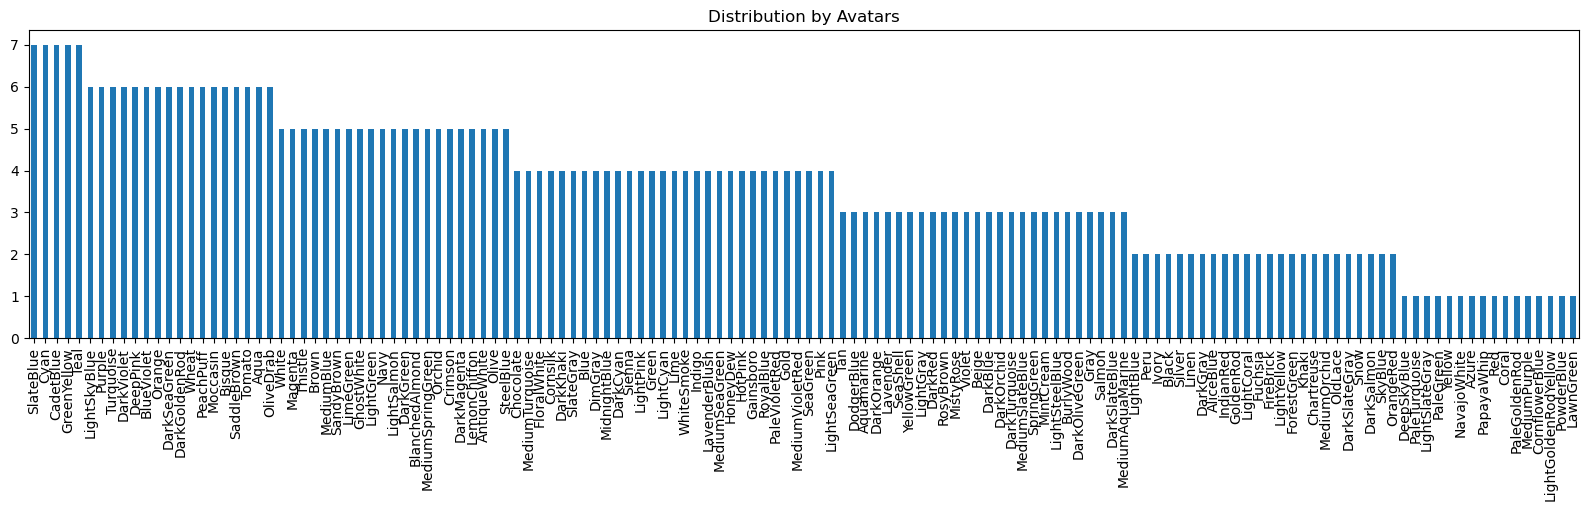

In [7]:
ecommerce_df.avatar.value_counts().plot.bar(figsize=(20, 4), title='Distribution by Avatars')

<AxesSubplot:title={'center':'Distribution by Email Themes'}>

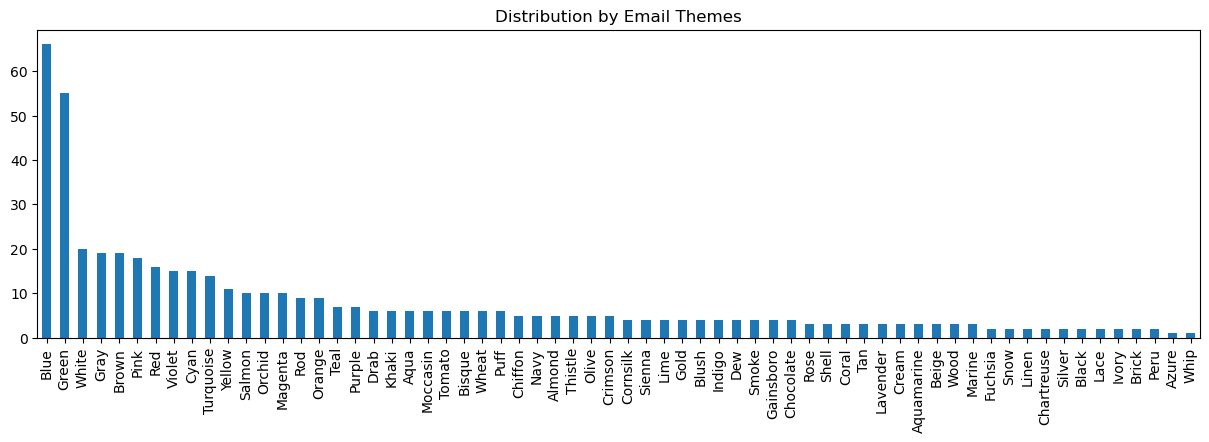

In [8]:
ecommerce_df.avatar_theme.value_counts().plot.bar(figsize=(15, 4), title='Distribution by Email Themes')

<AxesSubplot:title={'center':'Distribution by Avatar Themes - Simplified'}>

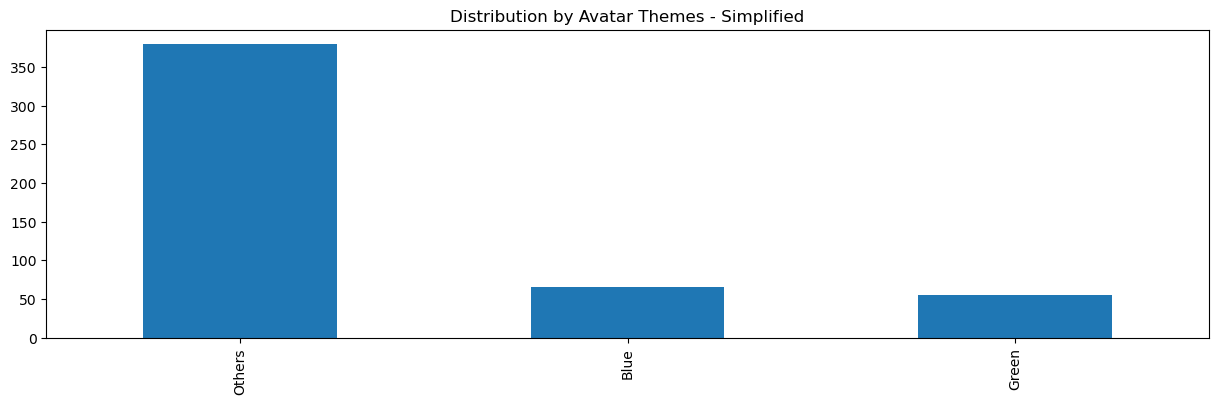

In [9]:
## Simplify 

ecommerce_df['avatar_theme3'] = ecommerce_df['avatar_theme'].apply(lambda x: x if x == 'Blue' or x == 'Green' else 'Others')

ecommerce_df.avatar_theme3.value_counts().plot.bar(figsize=(15, 4), title='Distribution by Avatar Themes - Simplified')

<AxesSubplot:title={'center':'Distribution by States'}>

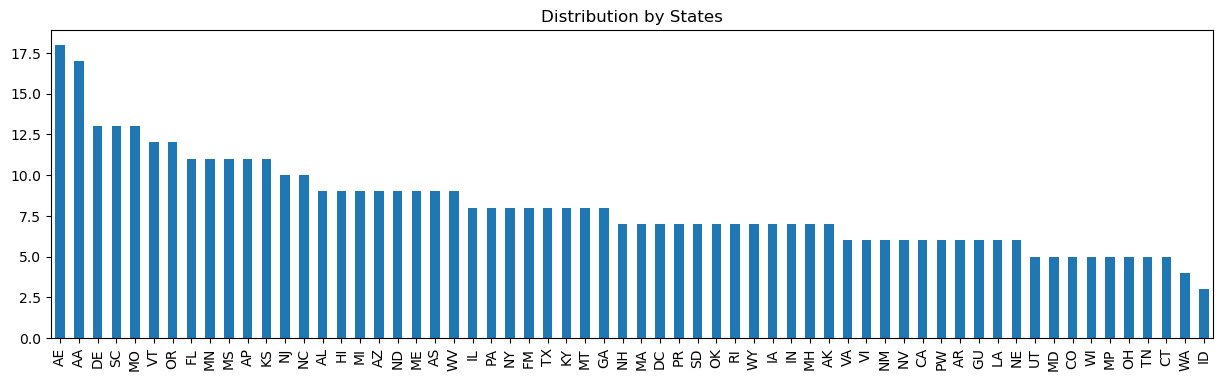

In [10]:
ecommerce_df.state.value_counts().plot.bar(figsize=(15, 4), title='Distribution by States')

<AxesSubplot:title={'center':'Distribution by Email Domains'}>

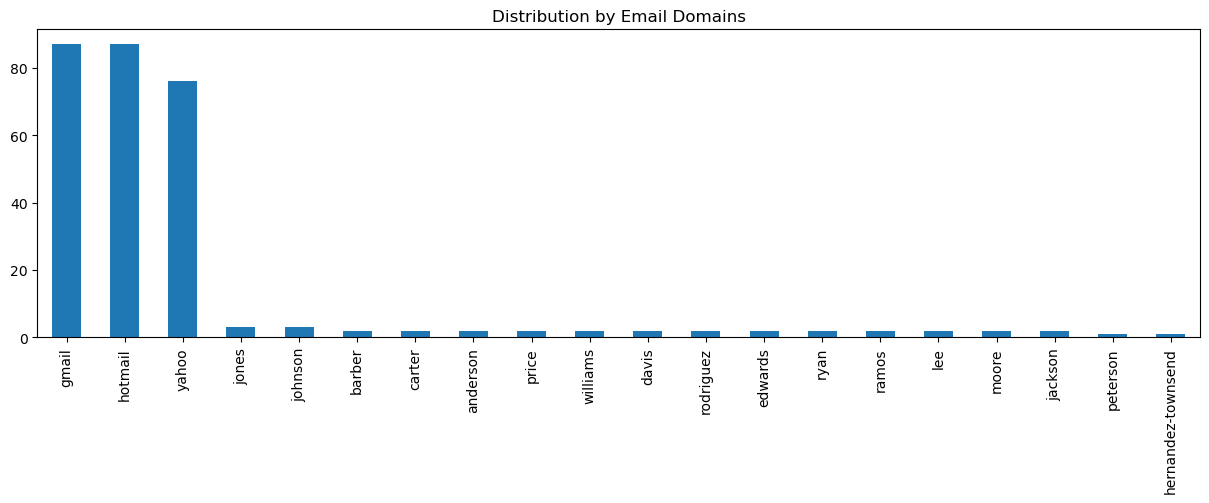

In [11]:
ecommerce_df.email_domain.value_counts().sort_values(ascending=False).head(20).plot.bar(figsize=(15, 4), title='Distribution by Email Domains')

<AxesSubplot:title={'center':'Distribution by Email Domains - Simplified'}>

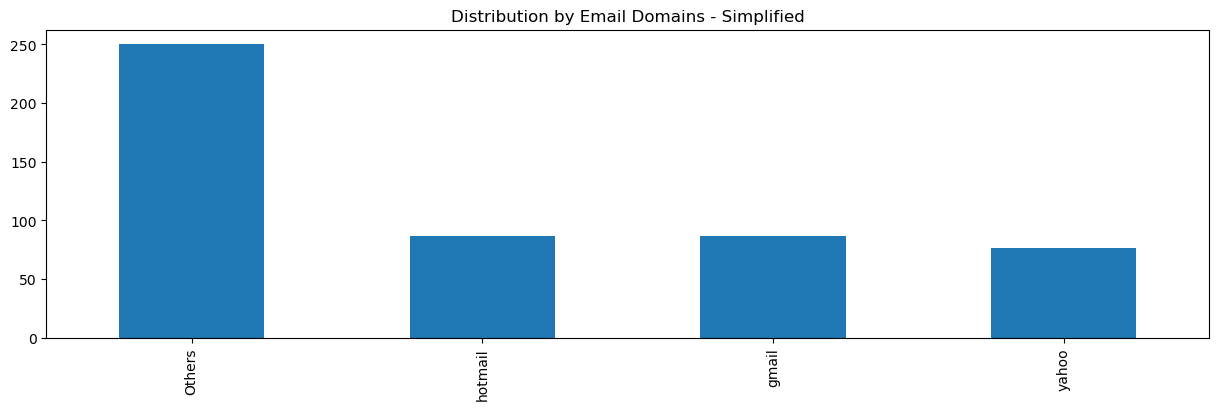

In [12]:
## Simplify 

ecommerce_df['email_domain4'] = ecommerce_df['email_domain'].apply(lambda x: x if x in ['hotmail','gmail','yahoo'] else 'Others')

ecommerce_df.email_domain4.value_counts().plot.bar(figsize=(15, 4), title='Distribution by Email Domains - Simplified')

📊 EDA: Continuous

The very first variable to pay attention is yearly_amount_spent, this is highly correlated with length_of_membership => Intuitively speaking, the longer you stay the more value you generated
EDA would aim to look into distribution of each variables, and the interactions among them (especially the interaction with target variables)
Though the relationship with other variables seems unclear. But we observe a positive correlation (in heatmap) between yearly_amount_spent vs. time_on_app and session_length

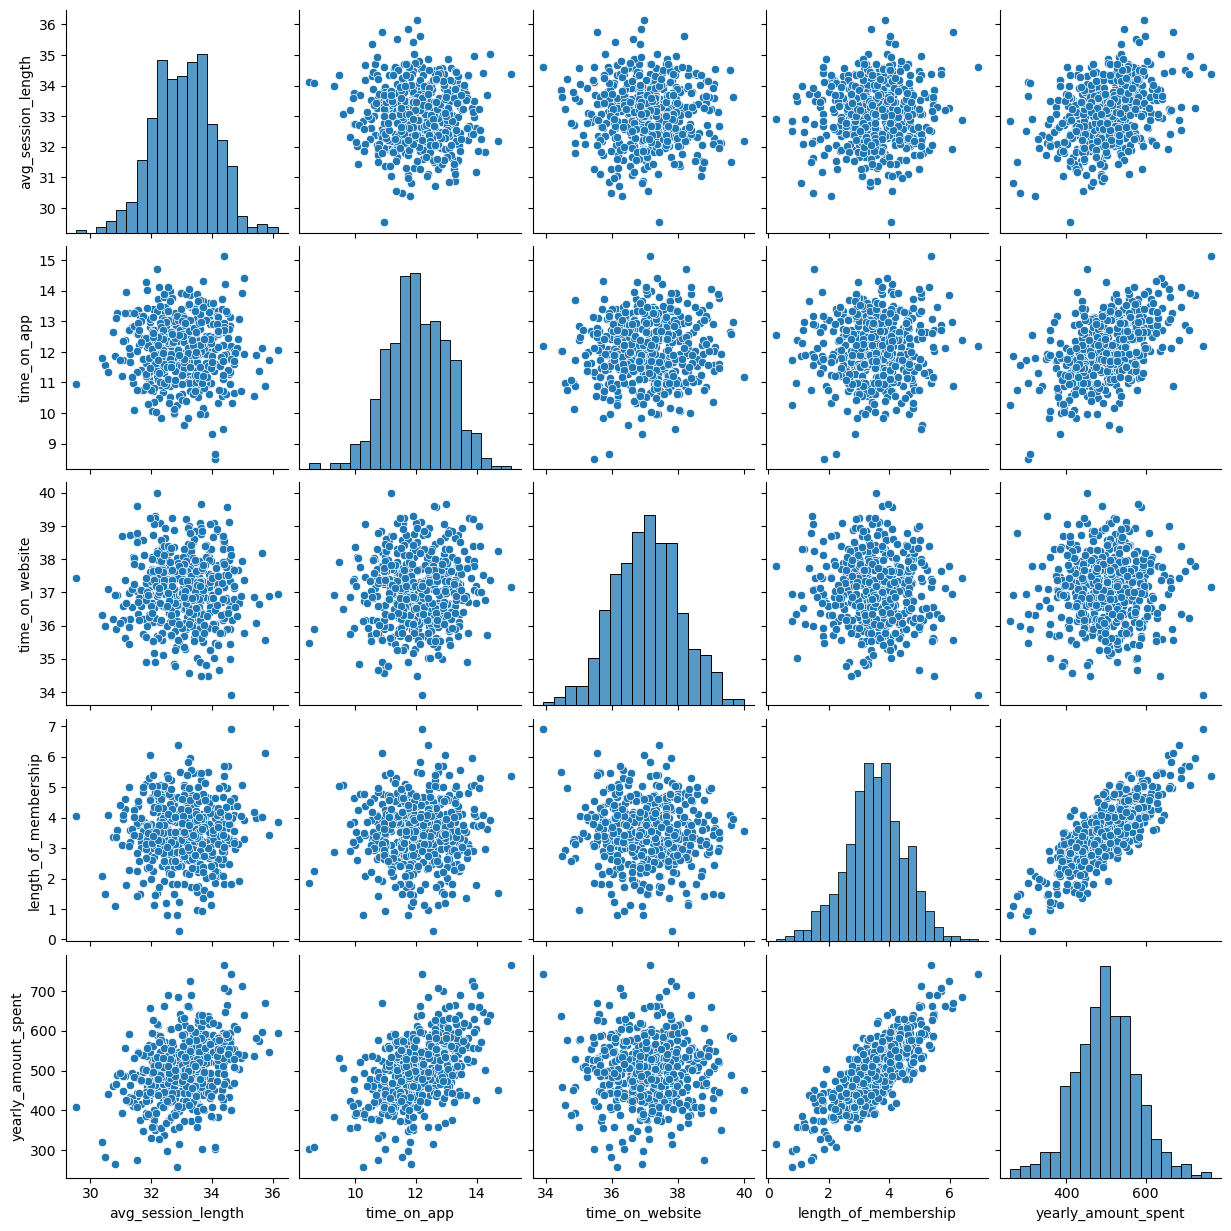

In [13]:
sns.pairplot(ecommerce_df)

<AxesSubplot:>

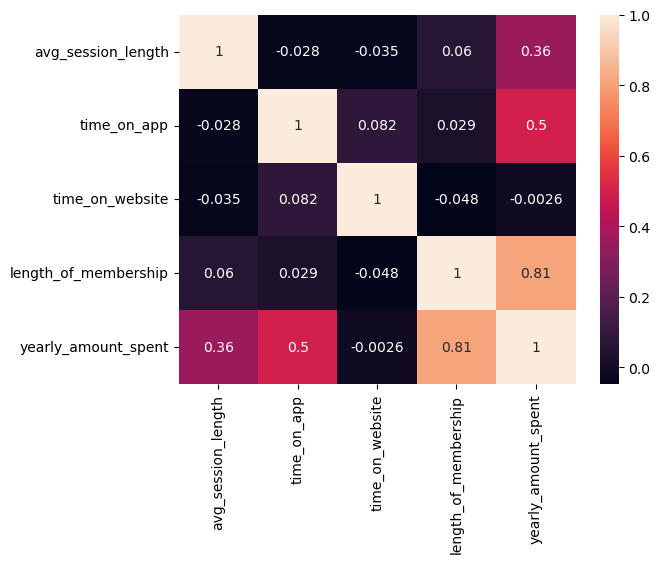

In [14]:
sns.heatmap(ecommerce_df.corr(), annot=True)

📊 EDA: Categorical
Similar we look into the relationship of Categorical Variables and Continuous Target Variables by graphing the median values of target variables on different categories
The more meaningful categorical variables would split the data into distinguished groups with more differences in Target variables (here summarised by Median or Mean)

<AxesSubplot:xlabel='email_domain'>

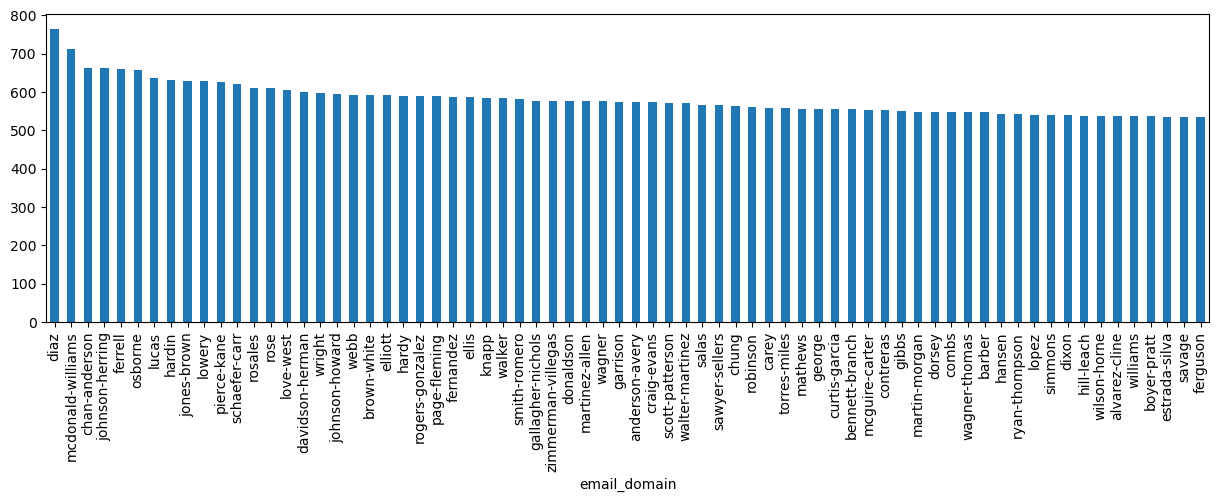

In [15]:
ecommerce_df.groupby('email_domain').yearly_amount_spent.median().sort_values(ascending=False).head(70).plot.bar(figsize=(15, 4))

<AxesSubplot:xlabel='email_domain4'>

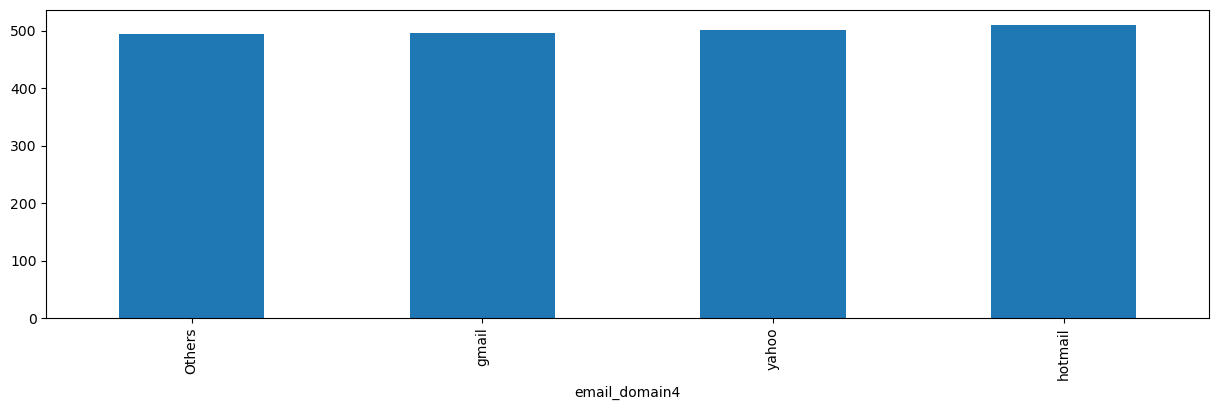

In [16]:
ecommerce_df.groupby('email_domain4').yearly_amount_spent.median().sort_values().head(20).plot.bar(figsize=(15, 4))

<AxesSubplot:xlabel='avatar_theme'>

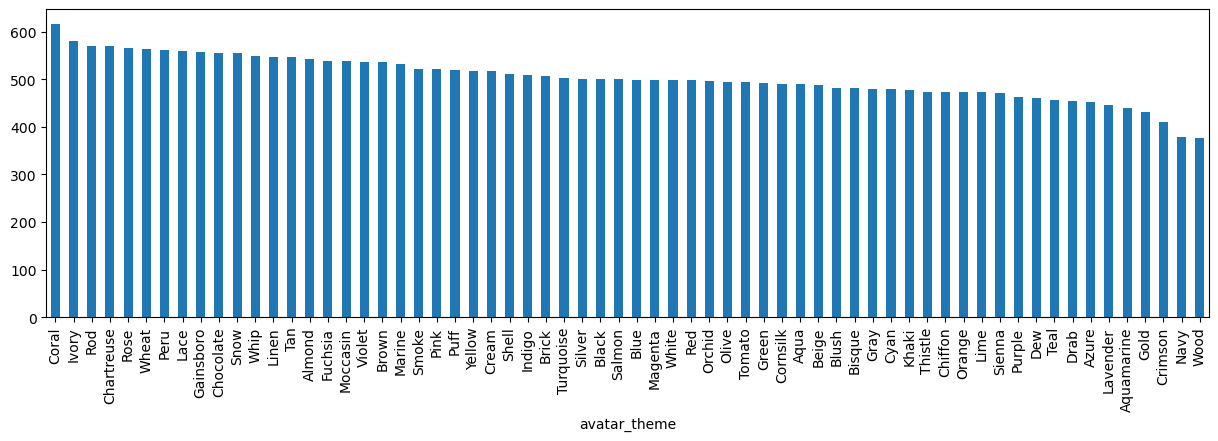

In [17]:
ecommerce_df.groupby('avatar_theme').yearly_amount_spent.median().sort_values(ascending=False).plot.bar(figsize=(15, 4))

In [18]:
ecommerce_df.groupby('avatar_theme3').yearly_amount_spent.median().sort_values()

avatar_theme3
Green     492.945053
Blue      499.318087
Others    502.092528
Name: yearly_amount_spent, dtype: float64

<AxesSubplot:title={'center':'Avg. Yearly Spent x States'}, xlabel='state'>

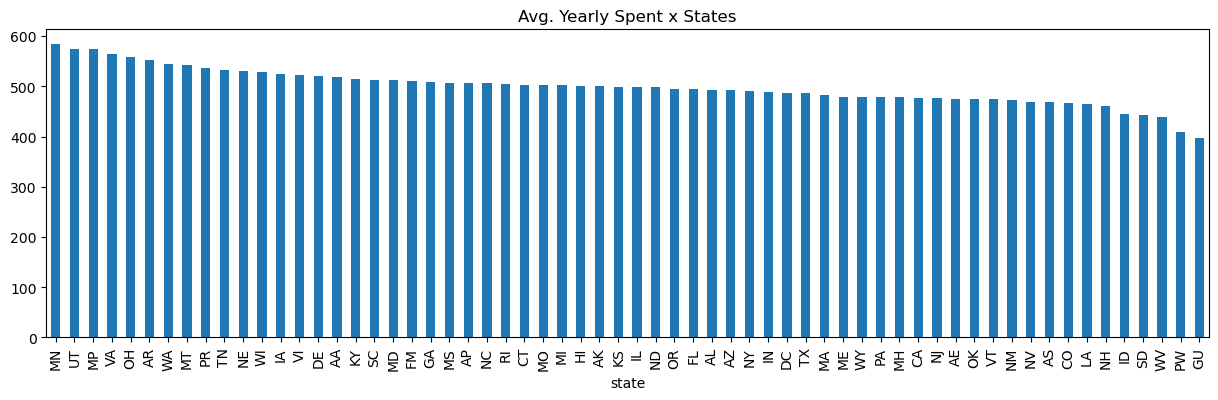

In [19]:
ecommerce_df.groupby('state').yearly_amount_spent.median().sort_values(ascending=False).plot.bar(figsize=(15, 4), title='Avg. Yearly Spent x States')

✔️ Target for Regressions & Classifications

<AxesSubplot:xlabel='yearly_amount_spent', ylabel='Density'>

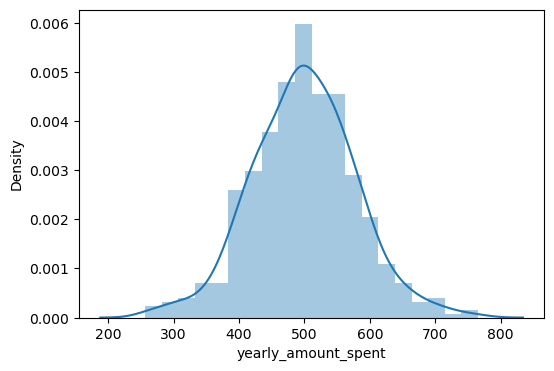

In [20]:
# quantity of yearly_amount_spent (numeric) is the target of regression problem

plt.figure(figsize = (6,4))
sns.distplot(ecommerce_df['yearly_amount_spent'])

In [21]:
# create the binary variable (=1 if yearly_amount_spent > q0.8)

ecommerce_df['yearly_amount_spent'].quantile(0.8)

ecommerce_df['is_highval'] = ecommerce_df['yearly_amount_spent'] > ecommerce_df['yearly_amount_spent'].quantile(0.8)

ecommerce_df['is_highval'].value_counts()

False    400
True     100
Name: is_highval, dtype: int64

✔️ Check Linearity (For Linear Regression)

<AxesSubplot:title={'center':'Linearity check: time_on_app vs. yearly_amount_spent'}, xlabel='time_on_app_10bin'>

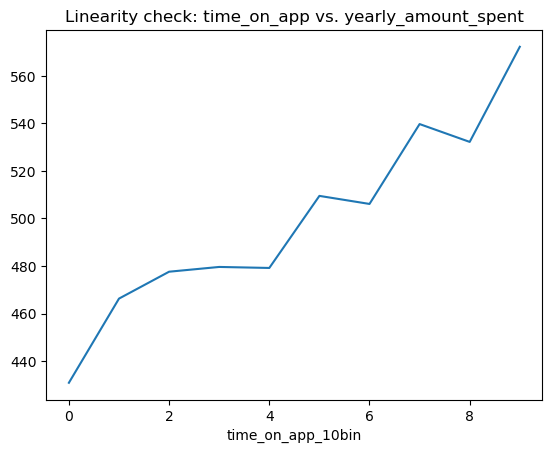

In [22]:
# bin plots (The bin into percentiles make the linearity clearer)

x_var = 'time_on_app' # Try other: avg_session_length, time_on_app, time_on_website, length_of_membership
y_var = 'yearly_amount_spent'
ecommerce_df[x_var + '_10bin'] = pd.qcut(ecommerce_df[x_var], q=10, labels=False) # divide to 10 bins equals in n
ecommerce_df.groupby(x_var + '_10bin')[y_var].mean().plot(title='Linearity check: {} vs. {}'.format(x_var, y_var))

In [23]:
# Split cat and numeric variables

cat_cols = ['avatar_theme3','email_domain4','state']
num_cols = ['avg_session_length','time_on_app','time_on_website','length_of_membership']
y_col = ['yearly_amount_spent']
y_class = ['is_highval']
one_hot_df = pd.get_dummies(ecommerce_df[cat_cols])
one_hot_cols = one_hot_df.columns
df_model = pd.merge(ecommerce_df, one_hot_df, left_index=True, right_index=True)
df_model = df_model[num_cols + list(one_hot_cols) + y_class + y_col]
df_model.head()

avg_session_length  time_on_app  time_on_website  length_of_membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   avatar_theme3_Blue  avatar_theme3_Green  avatar_theme3_Others  \
0                   0                    0                     1   
1                   0                    1                     0   
2                   0                    0                     1   
3                   0                    0                     1   
4                   0                    0                     1   

   email_domain4_Others  email_domain4_gmail  email_domain4_hotmail  ...  \
0                     1                    0                      0  ...   
1                     0                    0                      1  ...   
2                     0                    0                      0  ...   
3                     0                    1                      0  ...   
4                     1                    0                      0  ...   

   state_UT  state_VA  state_VI  state_VT  state_WA  state_WI  state_WV  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_WY  is_highval  yearly_amount_spent  
0         0        True           587.951054  
1         0       False           392.204933  
2         0       False           487.547505  
3         0        True           581.852344  
4         0        True           599.406092  

[5 rows x 75 columns]

✔️ Train-Test Data

In [24]:
# Split train set - test set

X = df_model.iloc[:,:-2]
y = df_model.iloc[:,-1]
y_class = df_model.iloc[:,-2]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

🧬 Clustering K-Means

The k-means clustering method is an unsupervised ML techniques to identify clusters of data objects in a dataset. There are many different clustering techniques, but k-means is the oldest and most approachable.

Algorithms

Specify the number of cluster (k) to assign
Randomly initialize k centroids
Repeat
Expectation: Assign each data points to the nearest centroid
Maximization: Compute the new centroid (mean) of each cluster
Until the centroid position do not change

Evaluation

Sum of Squared Error (SSE) => Centroid Coverge

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaled_X_train = StandardScaler().fit_transform(X_train.iloc[:,:4])

kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=1234)
kmeans.fit(scaled_X_train)

KMeans(init='random', n_clusters=3, random_state=1234)

In [28]:
print('The lowest SSE value: {}'.format(kmeans.inertia_))

print('Number of Iterations to Converge: {}'.format(kmeans.n_iter_))

print('--- Locations of the Centroid ---')

print(kmeans.cluster_centers_)

The lowest SSE value: 1000.0559005419155
Number of Iterations to Converge: 23
--- Locations of the Centroid ---
[[ 0.1177615   0.72215498  0.74667345  0.23406473]
 [ 0.54380777 -0.66408572 -0.45953869  0.59496923]
 [-0.58226653 -0.11999412 -0.32002823 -0.7380275 ]]


In [29]:
kmeans.labels_[:5]

array([1, 2, 0, 2, 2])

✔️ Elbow Method
Plot SSE curve as a function of cluster, SSE will decrease with the increase in k (more centroids are added the distance from each points to the centroid will decrease) => The Sweet Spot is elbow points, where the improvement in SSE is diminished with the additional centroids

In [30]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X_train)
    sse.append(kmeans.inertia_)

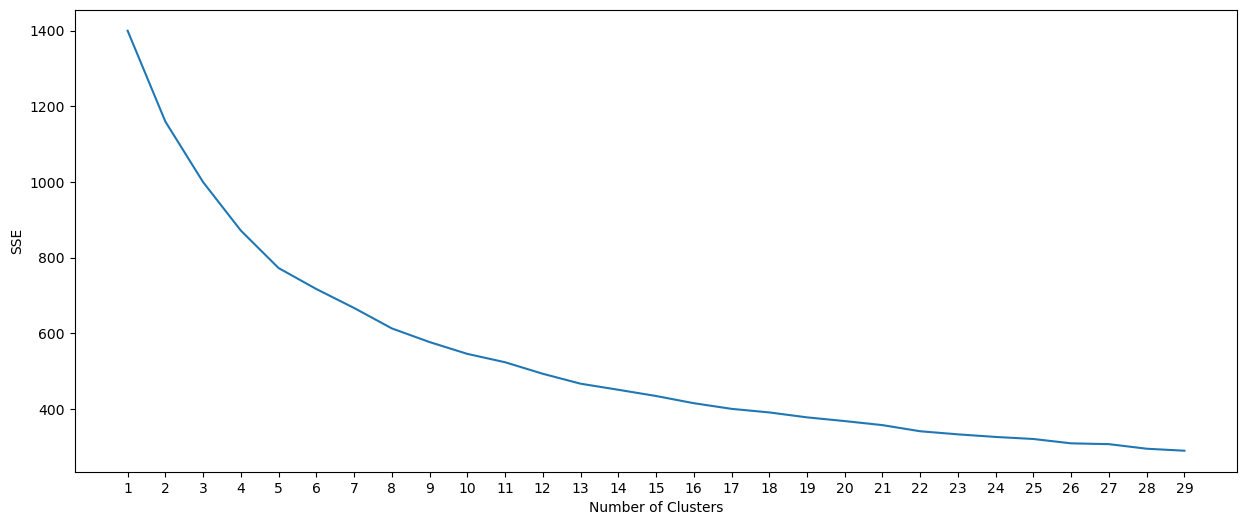

In [31]:
plt.figure(figsize = (15,6))
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
!pip install kneed

In [33]:
# Determine by kneed

from kneed import KneeLocator

kl = KneeLocator(range(1, 30), sse, curve="convex", direction="decreasing")

print('K-mean Elbow: {}'.format(kl.elbow))

K-mean Elbow: 8


✔️ Silhouette Coefficient
A measure of cluster cohesion and separation. It quantifies how well the data poitns fit to the centroid:

How close the data points to others belong to same cluster
How far the data points from others in other clusters
=> Select the n_clusters have the highest silhouette score

In [34]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X_train)
    score = silhouette_score(scaled_X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

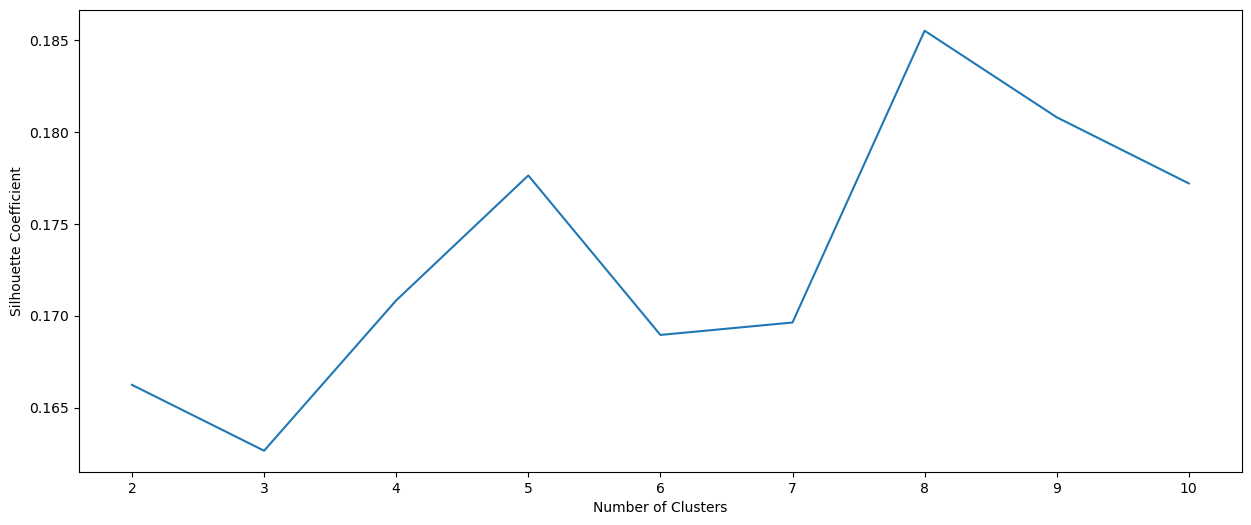

In [35]:
plt.figure(figsize = (15,6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

✔️ Group the Clusters

In [36]:
features = ['avg_session_length', 'time_on_app','time_on_website','length_of_membership']
kmeans_3 = KMeans(n_clusters=3, **kmeans_kwargs).fit(ecommerce_df[features])
ecommerce_df['cluster'] = kmeans_3.labels_
#sns.pairplot(data=ecommerce_df, hue="cluster");

In [37]:
ecommerce_df.groupby('cluster')[features].median()

avg_session_length  time_on_app  time_on_website  \
cluster                                                     
0                 32.397422    12.026942        37.088847   
1                 33.456676    11.677661        36.177832   
2                 33.431097    12.447617        37.806978   

         length_of_membership  
cluster                        
0                    2.924021  
1                    3.915918  
2                    3.905250

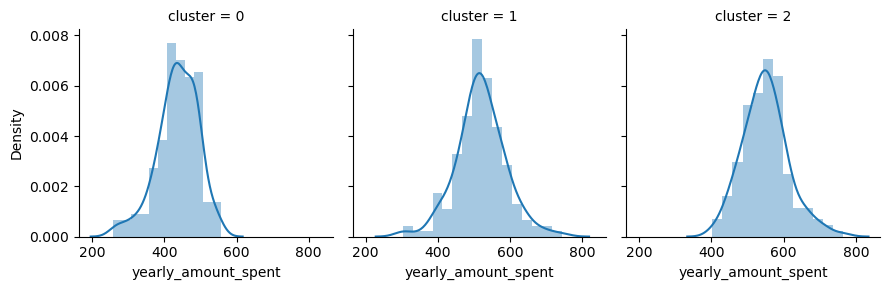

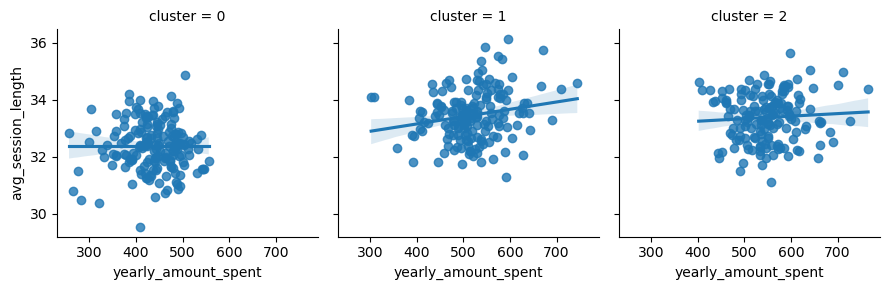

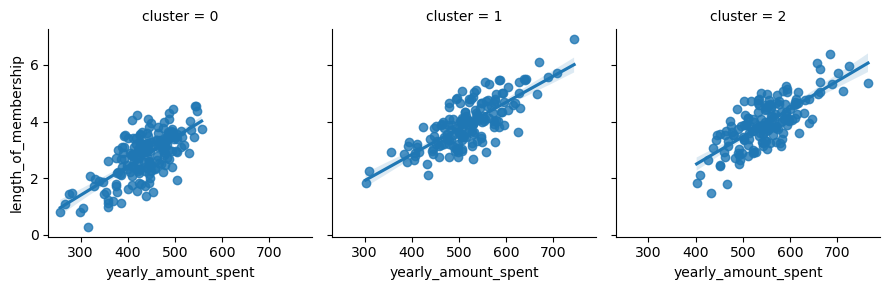

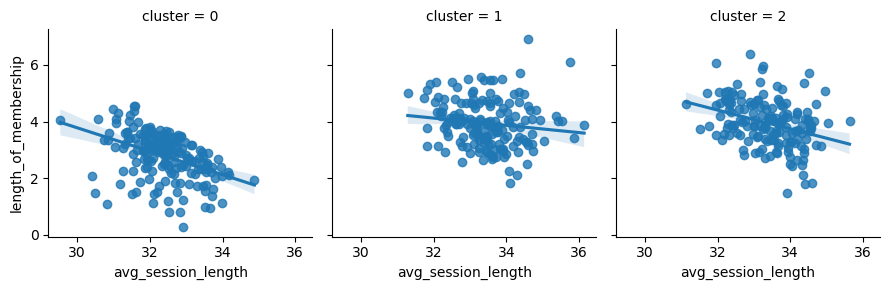

In [38]:
g = sns.FacetGrid(data=ecommerce_df, col='cluster')
g.map(sns.distplot, 'yearly_amount_spent')
g = sns.FacetGrid(data=ecommerce_df, col='cluster')
g.map(sns.regplot, 'yearly_amount_spent','avg_session_length')
g = sns.FacetGrid(data=ecommerce_df, col='cluster')
g.map(sns.regplot, 'yearly_amount_spent','length_of_membership')
g = sns.FacetGrid(data=ecommerce_df, col='cluster')
g.map(sns.regplot, 'avg_session_length','length_of_membership')

🧬 PCA
Principal Components Analysis is the technique to reduce the dimensions (cols of the data). From the orignal data with 2+ dimensions (features), we can reduce it to 2-dim which allow us:

Do visualize easily
As a step of processing data

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(ecommerce_df[features])

print('Explained Variance Ratio:' + str(pca.explained_variance_ratio_))

Explained Variance Ratio:[0.28084573 0.2597583 ]


In [40]:
dataPCA = pca.transform(ecommerce_df[features])

dataPCA = pd.DataFrame(dataPCA, columns= ['PC1','PC2'])

dataPCA['yearly_amount_spent'] = ecommerce_df['yearly_amount_spent']

dataPCA.head()

PC1       PC2  yearly_amount_spent
0 -1.110552  1.748838           587.951054
1 -0.515863 -1.475379           392.204933
2  0.447967 -0.035489           487.547505
3 -0.103148  1.030833           581.852344
4 -0.179926  1.251312           599.406092

<Figure size 1000x500 with 0 Axes>

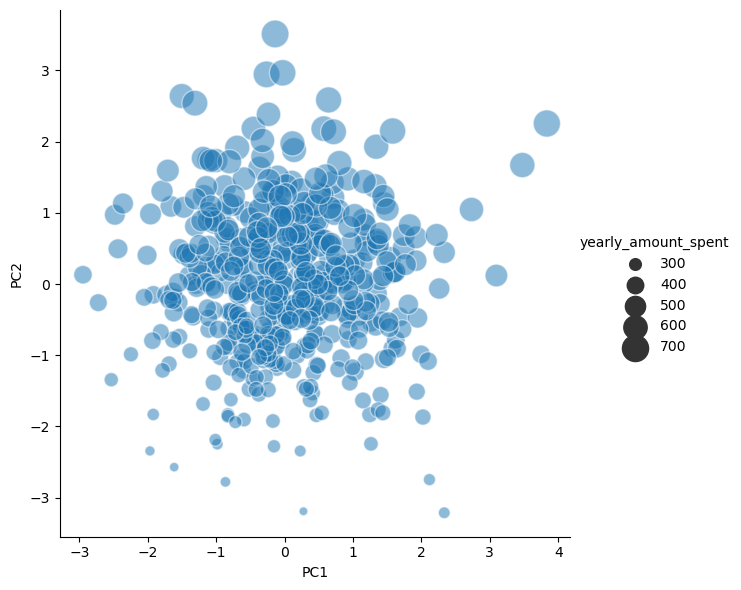

In [41]:
plt.figure(figsize=(10,5))
sns.relplot(x="PC1", y="PC2", size="yearly_amount_spent",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dataPCA)

✔️ PCA for K-Means

Here we apply the Pipeline from sklearn.pipeline to make the progress become smoother (and more elegant). We apply PCA, then doing the K-Means on top of it. Which recreate look-much-better graph.

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clusterer = Pipeline([(
    'kmeans', KMeans(
        n_clusters=3,
        init="k-means++",
        n_init=50,
        max_iter=500,
        random_state=42,
    ),
)])

preprocessor = Pipeline([
    ('minmax_scaler', MinMaxScaler()), 
    ('pca', PCA(n_components=2, random_state=42)),
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clusterer', clusterer)
])

In [43]:
pipe.fit(ecommerce_df[features])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3, n_init=50,
                                         random_state=42))]))])

In [44]:
preprocessed_data = pipe['preprocessor'].transform(ecommerce_df[features])

predicted_labels = pipe['clusterer']['kmeans'].labels_

print('Silhouette Score: {}'.format(silhouette_score(preprocessed_data, predicted_labels)))

Silhouette Score: 0.3302969088678362


In [45]:
data = ecommerce_df[features]

pcadf = pd.DataFrame(pipe["preprocessor"].transform(data), columns=["PC1", "PC2"])
pcadf['k_cluster'] = pipe["clusterer"]["kmeans"].labels_
pcadf['k_cluster'] = pcadf['k_cluster'].apply(str)
pcadf['yearly_amount_spent'] = ecommerce_df['yearly_amount_spent']
pcadf.head()

PC1       PC2 k_cluster  yearly_amount_spent
0 -0.343729 -0.275647         0           587.951054
1 -0.046980  0.238423         1           392.204933
2  0.040680 -0.017649         2           487.547505
3  0.000331 -0.147084         0           581.852344
4 -0.071035 -0.177258         0           599.406092

In [46]:
pcadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PC1                  500 non-null    float64
 1   PC2                  500 non-null    float64
 2   k_cluster            500 non-null    object 
 3   yearly_amount_spent  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


<Figure size 1000x500 with 0 Axes>

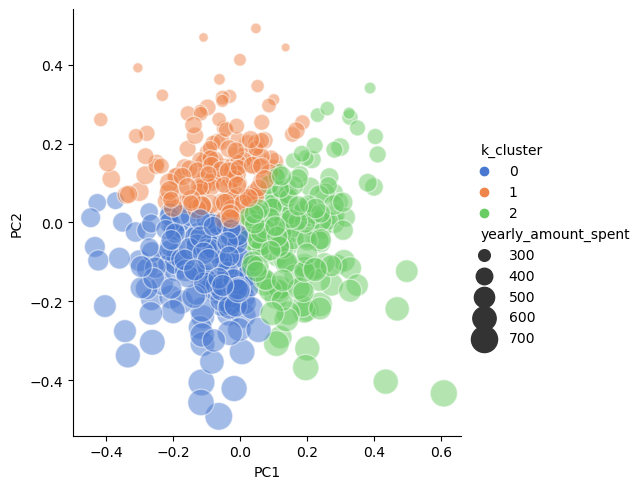

In [47]:
plt.figure(figsize=(10,5))
sns.relplot(x="PC1", y="PC2", hue='k_cluster', size="yearly_amount_spent",
            sizes=(40, 400), alpha=.5, palette="muted",
            data=pcadf)

✔️ Data Processing

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

pca_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()), 
    ('pca', PCA(n_components=2, random_state=42))
])

X_train = pipeline.fit_transform(X_train)
X_train_pca = pca_pipeline.fit_transform(X_train)

X_test = pipeline.transform(X_test)
X_test_pca = pca_pipeline.transform(X_test)

✔️ Evaluation

Regression
MAE: Mean Absolute Error => Easiest to understand, just average error (take absolute)
MSE: Mean Square Error => More popular, because MSE "punishes" larger errors, useful in the real world
RMSE: even more popular in MSE, because RMSE is interpretable in the "y" units

Classification
All these coming from the confusion matrix:
True positive (TP) - Observation is positive & is predicted to be positive
False negative (FN) - Observation is positive but is predicted to be negative
True negative (TN) - Observation is negative & is predicted to be negative
False positive (FP) - Observation is negative but is predicted to be positive
Accuracy: How accurate the model classify to the right class (cautious with imbalance)
Precision: More False Positive, the lower precision (False Positive is tolerant for high-risk problems, i.e. COVID diagnostic)
Recall (Sensitivity): More False Negative, the lower recall (False Negative is tolerant, Spam)
F1: single score balances both the concerns of precision and recall. Good F1-score = low Precision, low Recall. Perfect = 1, Failure = 0
ROC Curve: Plot of tpr (true positive rate) vs fpr (false positive rate) => Higher area under the curve better the models

In [49]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [50]:
def eval_class(true, predicted):
    acc = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    log_loss = metrics.log_loss(true, predicted)
    auc = metrics.roc_auc_score(true, predicted)
    return acc, precision, recall, f1, log_loss, auc

✔️ Model Explainer

For Random Forest, GBM, XGBoost

Rank the features by the importance to the model
SHAP - SHApley Additive exPlanations 

In [51]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [52]:
!pip install shap

  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [53]:
import shap

# Summary bee-swarm plot to show the global importance of each features and distribution of effect size
def plot_shap_feature_importance(model, X, feature_names):
    shap_values = shap.TreeExplainer(xgb).shap_values(X)
    shap.summary_plot(shap_values, X, feature_names)
    
# Dependence Plot to investigate the interaction between features
def plot_shap_feature_interaction(model, X, feature_names, f_orders = (1,2)):
    shap_interaction_values = shap.TreeExplainer(xgb).shap_interaction_values(X)
    shap.dependence_plot(f_orders, shap_interaction_values, X,feature_names)

🧬 Linear Regressions

Linear Asusumptions: Relationship between your input and output is linear (check by bins plot, transform: polynomial, absolute, log on exponential relationship)

Remove Noise: Assume that input and output not noisy (check by distribution plot, transform: Remove outliers on output/input if possible)

Remove Collinearity: Over-fit the data when you add highly correlated input variables (check by pairwise correlation)

Gaussian Distribution: More reliable when input/output is gaussian distribution (check by distribution, transform: Boxcox or log)

Rescale inputs: rescale input variables using standardization/normalisation (improve the above assumptions)

✔️ Fitting

In [54]:
from sklearn.linear_model import LinearRegression

# All features
lin_reg1 = LinearRegression(normalize=True)
lin_reg1.fit(X_train,y_train)

LinearRegression(normalize=True)

In [55]:
# print the intercept

print(lin_reg1.intercept_)

coeff_df = pd.DataFrame(lin_reg1.coef_, X.columns, columns=['Coefficient'])
coeff_df.head()

502.61166752937027


Coefficient
avg_session_length    2.492974e+01
time_on_app           3.900211e+01
time_on_website      -3.548486e-01
length_of_membership  6.345263e+01
avatar_theme3_Blue   -4.693822e+14

✔️ Prediction

<Figure size 600x400 with 0 Axes>

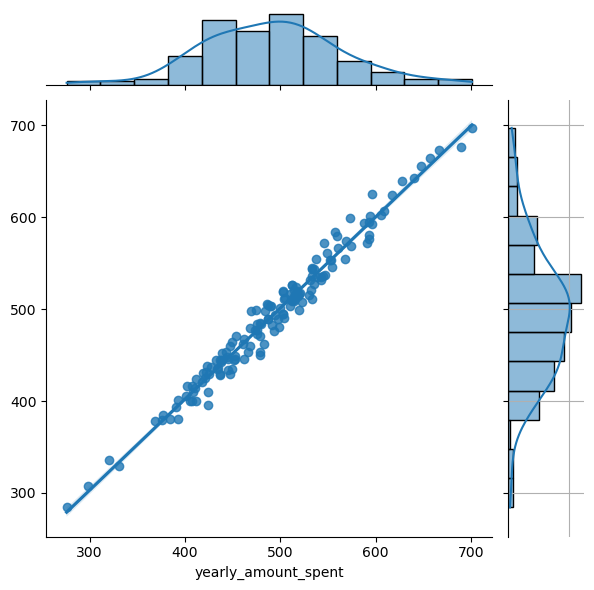

In [56]:
pred = lin_reg1.predict(X_test)

plt.figure(figsize = (6,4))
sns.jointplot(x= y_test,y= pred,kind='reg')
plt.grid()

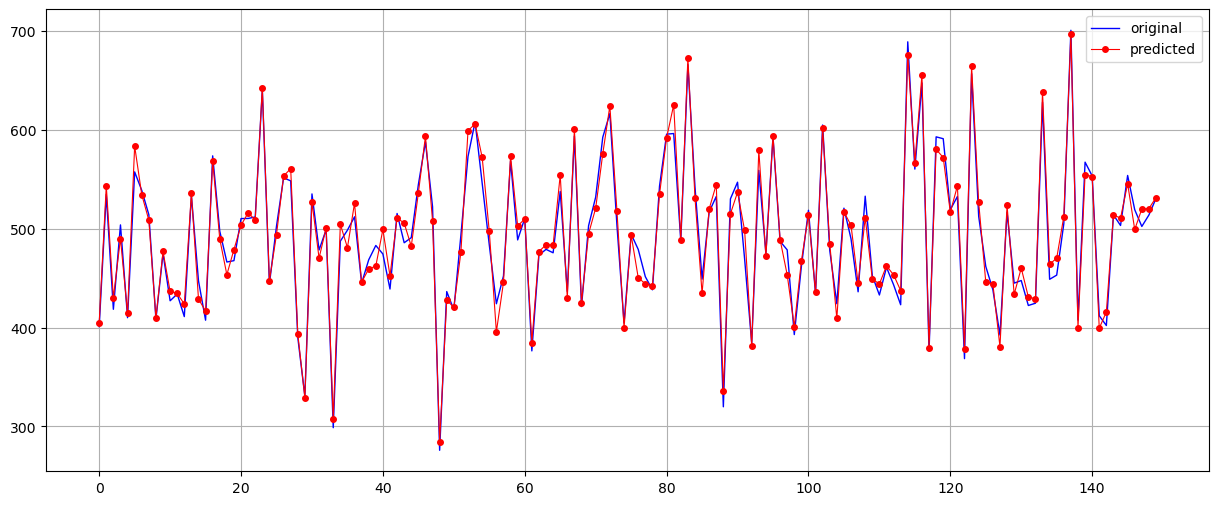

In [57]:
plt.figure(figsize = (15,6))
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw=1, color="blue", label="original")
plt.plot(x_ax, pred, lw=0.8, color="red", label="predicted",marker="o", markersize=4)
plt.legend()
plt.grid()
plt.show()

✔️ Diagnostics

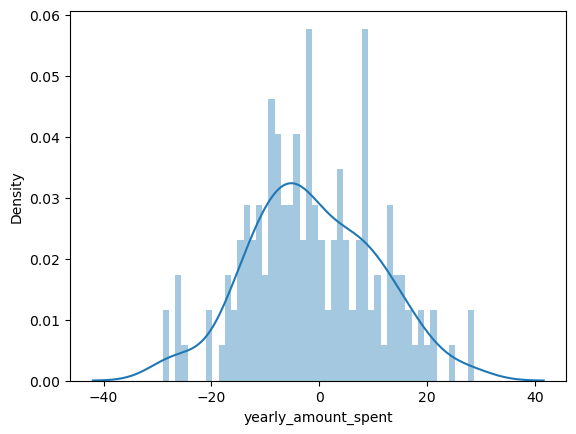

In [58]:
sns.distplot((y_test - pred), bins=50);

In [59]:
test_pred = lin_reg1.predict(X_test)
train_pred = lin_reg1.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.630405799413833
MSE: 138.96432433350745
RMSE: 11.788313040189738
R2 Square 0.9744255143785121
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.11833701709122
MSE: 81.95216686026743
RMSE: 9.052743609551053
R2 Square 0.987600220266285
__________________________________


In [60]:
eval_metrics = ['MAE', 'MSE', 'RMSE', 'R2_Square']
eval_m_train = [m + '_train' for m in eval_metrics]
eval_m_test = [m + '_test' for m in eval_metrics]
dis_m = ['Model','RMSE_train'] + eval_m_test + ['diff_RMSE_train_test']
results_df = pd.DataFrame(data=[["Linear Regression",*evaluate(y_train, train_pred),*evaluate(y_test, test_pred), cross_val(LinearRegression())]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])
results_df['diff_RMSE_train_test'] = results_df.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)
results_df[dis_m]

Model RMSE_train  MAE_test    MSE_test  RMSE_test  \
0  Linear Regression   9.052744  9.630406  138.964324  11.788313   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181

✔️ Over-fitting

Below we also try the Linear Regression, but remove all categorical variables => Set-up: Linear Regression - Numeric. Look into the report of evaluation:

Linear Regression (All Variables): RMSE in train is low but in test is higher (increase 28%) => Not stable, due to the overfiting (?) the performance in test is not great

Linear Regression (Numeric Variables): RMSE in train is higher than All variables but in test is RMSE is better (increase 3.8%) => More stable

In [61]:
# Try the model specifications to remove the cat variables
# All features

lin_reg2 = LinearRegression(normalize=True)
features_list = X.columns[:4]
lin_reg2.fit(X_train[:,:4],y_train) ## First 4 cols are numeric

# print the intercept
print(lin_reg2.intercept_)
coeff_df = pd.DataFrame(lin_reg2.coef_, features_list, columns=['Coefficient'])
coeff_df

502.36544675088646


Coefficient
avg_session_length      25.468114
time_on_app             38.743243
time_on_website          0.468548
length_of_membership    63.353471

In [62]:
## Prediction

test_pred2 = lin_reg2.predict(X_test[:,:4])

train_pred2 = lin_reg2.predict(X_train[:,:4])

In [63]:
## Evaluation

results_df2 = pd.DataFrame(data=[["Linear Regression - Numeric",*evaluate(y_train, train_pred2),*evaluate(y_test, test_pred2), 0]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])

results_df2['diff_RMSE_train_test'] = results_df2.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)

results_df = results_df.append(results_df2, ignore_index=True)

results_df[dis_m]

Model RMSE_train  MAE_test    MSE_test  RMSE_test  \
0            Linear Regression   9.052744  9.630406  138.964324  11.788313   
1  Linear Regression - Numeric   9.820232  8.426092  103.915541  10.193897   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051

✔️ Linear Regression with PCA

In [64]:
## Fitting
lin_reg2b = LinearRegression(normalize=True)
lin_reg2b.fit(X_train_pca,y_train) ## First 4 cols are numeric

## Prediction
test_pred2b = lin_reg2b.predict(X_test_pca)
train_pred2b = lin_reg2b.predict(X_train_pca)

In [65]:
## Evaluation

results_df2b = pd.DataFrame(data=[["Linear Regression - PCA",*evaluate(y_train, train_pred2b),*evaluate(y_test, test_pred2b), 0]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])

results_df2b['diff_RMSE_train_test'] = results_df2b.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)

results_df = results_df.append(results_df2b, ignore_index=True)

results_df[dis_m]

Model RMSE_train   MAE_test     MSE_test  RMSE_test  \
0            Linear Regression   9.052744   9.630406   138.964324  11.788313   
1  Linear Regression - Numeric   9.820232   8.426092   103.915541  10.193897   
2      Linear Regression - PCA  81.041989  58.054988  5530.838686  74.369609   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051  
2      -0.017875            -0.082332

🧬 Polynomial Regression

We can use linear model to trained nonlinear data. Linear model has the advantages of fast training, and fit a wide range of data. Linear Regressions could be fitted on polynomial features to capture the non-linear relationship.

✔️ Data Processing

In [66]:
from sklearn.preprocessing import PolynomialFeatures

## Processing
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train[:,:4])
X_test_2d = poly_reg.transform(X_test[:,:4])

## Fitting
lin_reg3 = LinearRegression(normalize=True)
lin_reg3.fit(X_train_2d,y_train)

## Prediction
test_pred3 = lin_reg3.predict(X_test_2d)
train_pred3 = lin_reg3.predict(X_train_2d)

In [67]:
## Evaluation

results_df3 = pd.DataFrame(data=[["Polynomial Regression",*evaluate(y_train, train_pred3),*evaluate(y_test, test_pred3), 0]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])

results_df3['diff_RMSE_train_test'] = results_df3.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)

results_df = results_df.append(results_df3, ignore_index=True)

results_df[dis_m]

Model RMSE_train   MAE_test     MSE_test  RMSE_test  \
0            Linear Regression   9.052744   9.630406   138.964324  11.788313   
1  Linear Regression - Numeric   9.820232   8.426092   103.915541  10.193897   
2      Linear Regression - PCA  81.041989  58.054988  5530.838686  74.369609   
3        Polynomial Regression   9.682298   8.594293   109.347404  10.456931   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051  
2      -0.017875            -0.082332  
3       0.979876             0.080005

🧬 Support Vector Regressors

In [68]:
from sklearn.svm import SVR # Support Vector Regression

## Fitting
svm_reg = SVR(kernel='rbf', C=1, epsilon=20)
svm_reg.fit(X_train[:,:4], y_train)

## Prediction
test_pred4 = svm_reg.predict(X_test[:,:4])
train_pred4 = svm_reg.predict(X_train[:,:4])

In [69]:
## Evaluation

results_df4 = pd.DataFrame(data=[["SVM Regressor",*evaluate(y_train, train_pred4),*evaluate(y_test, test_pred4), 0]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])

results_df4['diff_RMSE_train_test'] = results_df4.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)

results_df = results_df.append(results_df4, ignore_index=True)

results_df[dis_m]

Model RMSE_train   MAE_test     MSE_test  RMSE_test  \
0            Linear Regression   9.052744   9.630406   138.964324  11.788313   
1  Linear Regression - Numeric   9.820232   8.426092   103.915541  10.193897   
2      Linear Regression - PCA  81.041989  58.054988  5530.838686  74.369609   
3        Polynomial Regression   9.682298   8.594293   109.347404  10.456931   
4                SVM Regressor  65.519243  43.659695  3507.040323  59.220270   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051  
2      -0.017875            -0.082332  
3       0.979876             0.080005  
4       0.354577            -0.096139

In [70]:
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

x_var = 'avg_session_length'
y_var = 'yearly_amount_spent'

# Note, we need X to be a 2D array, hence reshape
X=df_model[x_var].values.reshape(-1,1)
y=df_model[y_var].values

# ------- SVR vs. LR -------
lr = LinearRegression().fit(X, y)
svr = SVR(kernel='rbf', C=10, epsilon=20).fit(X, y)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = lr.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = lr.predict(x_range.reshape(-1, 1)) # SVR

fig = px.scatter(df_model, x=df_model[x_var], y=df_model[y_var], opacity=0.8, color_discrete_sequence=['black'])

# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+20, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-20, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Yearly Amount Spent Prediction", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

🧬 Random Forest Regressor

Random Forest is an esemble of Decision Trees.

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Fitting
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=3)
rf_reg.fit(X_train[:,:4], y_train)

# Prediction
test_pred5 = rf_reg.predict(X_test[:,:4])
train_pred5 = rf_reg.predict(X_train[:,:4])

## Evaluation
results_df5 = pd.DataFrame(data=[["RF Regressor",*evaluate(y_train, train_pred5),*evaluate(y_test, test_pred5), 0]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])
results_df5['diff_RMSE_train_test'] = results_df5.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)
results_df = results_df.append(results_df5, ignore_index=True)
results_df[dis_m]

Model RMSE_train   MAE_test     MSE_test  RMSE_test  \
0            Linear Regression   9.052744   9.630406   138.964324  11.788313   
1  Linear Regression - Numeric   9.820232   8.426092   103.915541  10.193897   
2      Linear Regression - PCA  81.041989  58.054988  5530.838686  74.369609   
3        Polynomial Regression   9.682298   8.594293   109.347404  10.456931   
4                SVM Regressor  65.519243  43.659695  3507.040323  59.220270   
5                 RF Regressor  31.142176  25.918407  1023.682172  31.995034   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051  
2      -0.017875            -0.082332  
3       0.979876             0.080005  
4       0.354577            -0.096139  
5       0.811605             0.027386

<Figure size 600x400 with 0 Axes>

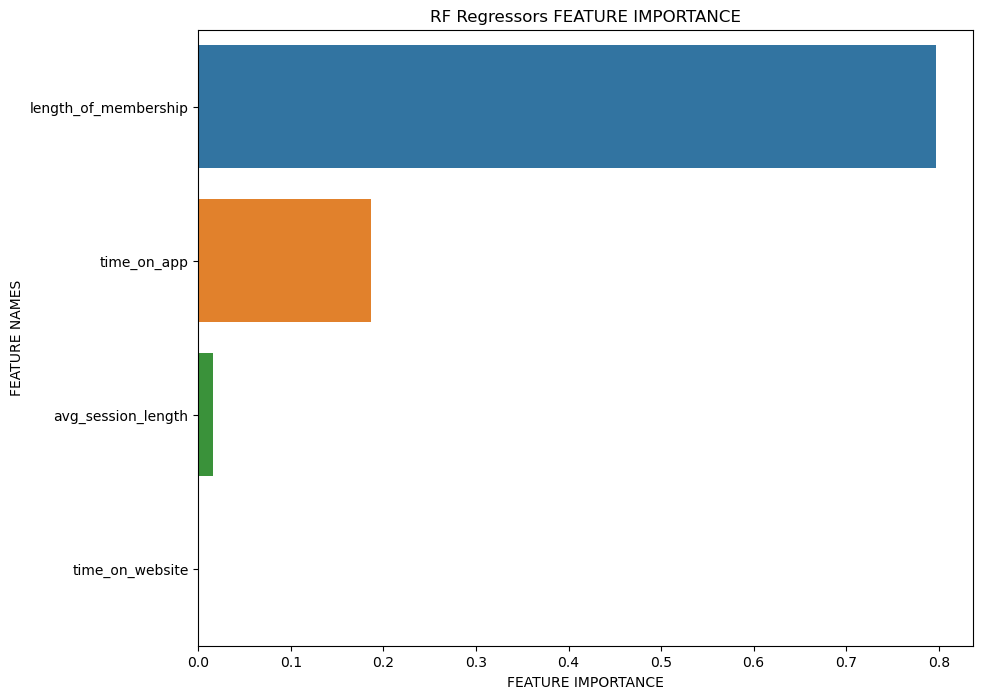

In [72]:
plt.figure(figsize = (6,4))
plot_feature_importance(rf_reg.feature_importances_,['avg_session_length', 'time_on_app','time_on_website','length_of_membership'],'RF Regressors')

🧬 XGBoost Regressor

XGBoost goes through the modeling cycle for iterations, repeately bulding new models then combine them into an ensemble model.

Start the cycle to calculate errors for each observations in dataset
Build the next model to predict errors
Add predictions from the error-predicting model to the "ensemble of models"
Model Tuning Hyperparameters that dramatically affecy the accuracy and training speed:

n_estimators: How many times to go through the modeling cycle. Too low n_estimators, model is underfitting (low accuracy in both training and testing). 
Typical range: 100-1000. Depends also on learning_rate.

early_stopping_rounds: model stops iterating when validation score stops improving, even if we don't set n_estimators. If the value = 5, means we stop after 5 straight rounds that the validation score not improve.
==> Strategy: Set high n_estimators and use early_stopping_rounds to find the optimal time to stop iterating (cautious with local optimum)

learning_rate: instead of only adding up the predictions from new models, we multiply prediction by a small number before add up. This means the new tree/model add to the ensemble helps us less => Reduce the propensity of overfit (penalty the complexity). So that, we can have high n_estimators and control by this. But, it will take longer to train (more iterations)
n_jobs: for large datasets, parallelism to build the model faster (n_jobs is the numbers of cores on the machines) => To speed up modeling time.

Reference: XGBoost Kaggle Tutorial

In [73]:
from xgboost import XGBRegressor
from xgboost import plot_importance

## Fitting
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Add silent=True to avoid printing out updates with each cycle
xgb.fit(X_train[:,:4], y_train, early_stopping_rounds=5, eval_set=[(X_test[:,:4], y_test)], verbose=False)

# Prediction
test_pred6 = xgb.predict(X_test[:,:4])
train_pred6 = xgb.predict(X_train[:,:4])

## Evaluation
results_df6 = pd.DataFrame(data=[["XGB Regressor",*evaluate(y_train, train_pred6),*evaluate(y_test, test_pred6), 0]], 
                          columns=[['Model'] + eval_m_train + eval_m_test + ['CV']])
results_df6['diff_RMSE_train_test'] = results_df5.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)
results_df = results_df.append(results_df6, ignore_index=True)
results_df[dis_m]

Model RMSE_train   MAE_test     MSE_test  RMSE_test  \
0            Linear Regression   9.052744   9.630406   138.964324  11.788313   
1  Linear Regression - Numeric   9.820232   8.426092   103.915541  10.193897   
2      Linear Regression - PCA  81.041989  58.054988  5530.838686  74.369609   
3        Polynomial Regression   9.682298   8.594293   109.347404  10.456931   
4                SVM Regressor  65.519243  43.659695  3507.040323  59.220270   
5                 RF Regressor  31.142176  25.918407  1023.682172  31.995034   
6                XGB Regressor   4.229881  11.386887   196.139302  14.004974   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051  
2      -0.017875            -0.082332  
3       0.979876             0.080005  
4       0.354577            -0.096139  
5       0.811605             0.027386  
6       0.963903             0.027386

<Figure size 1500x600 with 0 Axes>

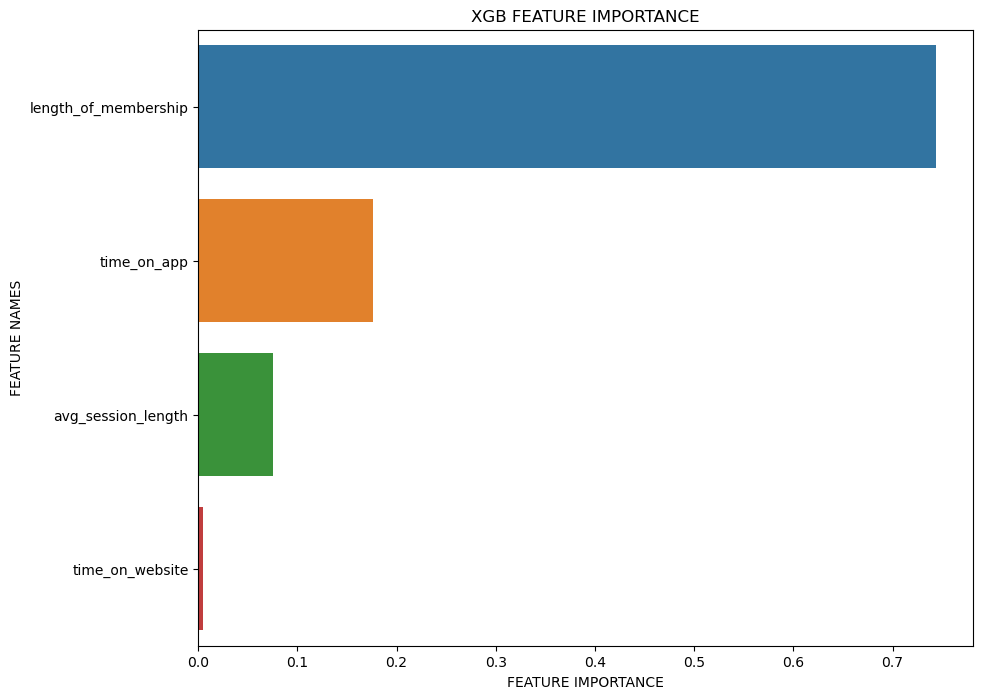

In [74]:
xgb.feature_names = ['avg_session_length', 'time_on_app','time_on_website','length_of_membership']
plt.figure(figsize = (15,6))
plot_feature_importance(xgb.feature_importances_, xgb.feature_names, 'XGB')

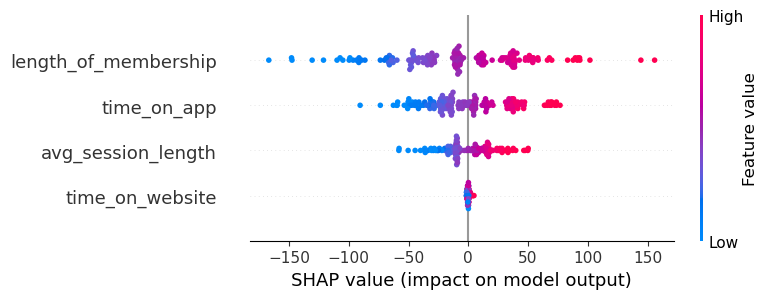

In [75]:
feature_names = ['avg_session_length', 'time_on_app','time_on_website','length_of_membership']
plot_shap_feature_importance(xgb, X_test[:,:4], feature_names)

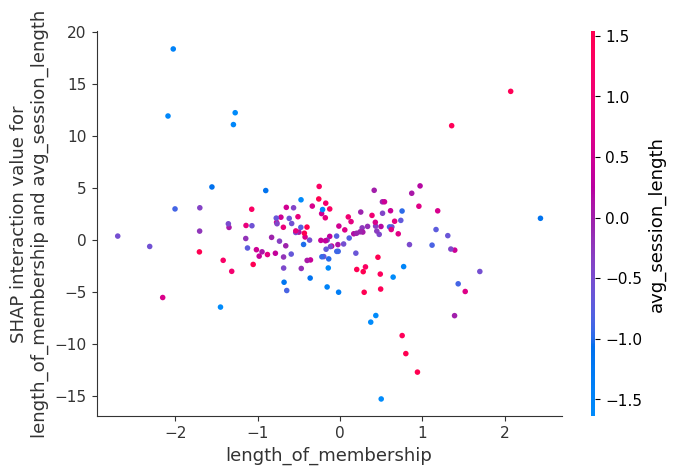

In [76]:
plot_shap_feature_interaction(xgb, X_test[:,:4],['avg_session_length', 'time_on_app','time_on_website','length_of_membership'], (3,0))

📈 Regressors Comparison

In [77]:
results_df[dis_m]

Model RMSE_train   MAE_test     MSE_test  RMSE_test  \
0            Linear Regression   9.052744   9.630406   138.964324  11.788313   
1  Linear Regression - Numeric   9.820232   8.426092   103.915541  10.193897   
2      Linear Regression - PCA  81.041989  58.054988  5530.838686  74.369609   
3        Polynomial Regression   9.682298   8.594293   109.347404  10.456931   
4                SVM Regressor  65.519243  43.659695  3507.040323  59.220270   
5                 RF Regressor  31.142176  25.918407  1023.682172  31.995034   
6                XGB Regressor   4.229881  11.386887   196.139302  14.004974   

  R2_Square_test diff_RMSE_train_test  
0       0.974426             0.302181  
1       0.980876             0.038051  
2      -0.017875            -0.082332  
3       0.979876             0.080005  
4       0.354577            -0.096139  
5       0.811605             0.027386  
6       0.963903             0.027386

🧬 Decision Tree Classifier

Parameters:

criterion{“gini”, “entropy”}, default=”gini”: Function to measure the quality of split

max_depth: how many layers the tree has (to avoid too complex tree => overfitting)

min_samples_split: minimum numbers of samples for each split (to avoid splitting to too small groups => overfitting)

min_samples_leaft: minimum numbers of samples for each leaf node (to avoid splitting to too small groups => overfitting)

min_impurity_decrease: early stops the tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [78]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state=1234, max_depth=3)

clf_model = clf.fit(X_train[:,:4], y_class_train)

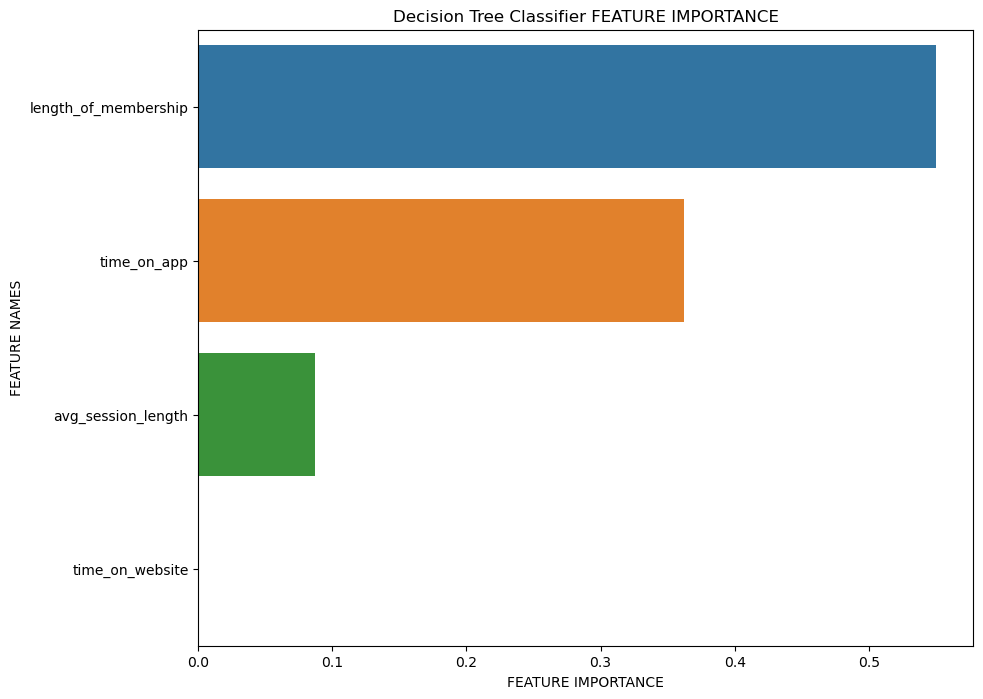

In [79]:
plot_feature_importance(clf_model.feature_importances_,['avg_session_length', 'time_on_app','time_on_website','length_of_membership'],'Decision Tree Classifier')

In [80]:
# Prediction
test_pred_class1 = clf_model.predict(X_test[:,:4])
train_pred_class1 = clf_model.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class1, y_class_test)

array([[123,   9],
       [  5,  13]], dtype=int64)

In [81]:
eval_clm_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'Log_loss','AUC']
eval_clm_train = [m + '_train' for m in eval_clm_metrics]
eval_clm_test = [m + '_test' for m in eval_clm_metrics]
dis_clm = ['Model','Accuracy_train'] + eval_clm_test + ['diff_Acc_train_test']
res_clm = pd.DataFrame(data=[["Decision Tree Classifier",*eval_class(y_class_train, train_pred_class1),
                                 *eval_class(y_class_test, test_pred_class1)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])
res_clm['diff_Acc_train_test'] = res_clm.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)
res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   

  Recall_test F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909    0.65      3.223646  0.775923           -0.011423

🧬 Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [82]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Technique for tunning the model

# Training
logit_model = LogisticRegression(random_state=5, class_weight='balanced')
logit_model = logit_model.fit(X_train[:,:4], y_class_train)

# Prediction
test_pred_class2 = logit_model.predict(X_test[:,:4])
train_pred_class2 = logit_model.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class2, y_class_test)

array([[122,   1],
       [  6,  21]], dtype=int64)

In [83]:
# Evaluation on Train & Test set

res_clm2 = pd.DataFrame(data=[["Logistic Model",*eval_class(y_class_train, train_pred_class2),
                                 *eval_class(y_class_test, test_pred_class2)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])

res_clm2['diff_Acc_train_test'] = res_clm2.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)

res_clm = res_clm.append(res_clm2, ignore_index=True)

res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387

🧬 GBM Classifier

Parameters:

loss{‘deviance’, ‘exponential’}, default=’deviance’: Loss function to be optimized (Deviance = logit)
learning_rate: shrunks the contribution of each tree (trade off between n_estimators and learning_date)
n_estimators: Number of boosting stage (GB fairly robust to over-fitting => large number can boost the performance)
max_depth, min_impurity_decrease

Hyperparameter Fine-tuning – Logistic Regression
There are no essential hyperparameters to adjust in logistic regression. Even though it has many parameters, the following three parameters might be helpful in fine-tuning for some better results,

Regularization (penalty) might be beneficial at times.

Penalty – {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

The penalty strength is controlled by the C parameter, which might be useful.

C – float, default=1.0

With different solvers, you might sometimes observe useful variations in performance or convergence.
Solver – {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

Note: The algorithm to use is determined by the penalty: Solver-supported penalties:

1. ‘newton-cg’ – [‘l2’, ‘none’]

2. ‘lbfgs’ – [‘l2’, ‘none’]

3. ‘liblinear’ – [‘l1’, ‘l2’]

4. ‘sag’ – [‘l2’, ‘none’]

5. ‘saga’ – [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

# Training
gbm_cmodel = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01)
gbm_cmodel = gbm_cmodel.fit(X_train[:,:4], y_class_train)

# Prediction
test_pred_class3 = gbm_cmodel.predict(X_test[:,:4])
train_pred_class3 = gbm_cmodel.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class3, y_class_test)

array([[124,   5],
       [  4,  17]], dtype=int64)

In [85]:
# Evaluation on Train & Test set

res_clm3 = pd.DataFrame(data=[["GBM Classifier",*eval_class(y_class_train, train_pred_class3),
                                 *eval_class(y_class_test, test_pred_class3)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])

res_clm3['diff_Acc_train_test'] = res_clm3.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)

res_clm = res_clm.append(res_clm3, ignore_index=True)

res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   
2            GBM Classifier       1.000000      0.940000       0.809524   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387  
2    0.772727  0.790698      2.072348  0.870739           -0.060000

🧬 LightGBM Classifier

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks

For better accuracy:

Use large max_bin (may be slower)

Use small learning_rate with large num_iterations.

Use large num_leaves (may cause over-fitting)

Use bigger training data.

Try dart.

Try to use categorical feature directly.

In [86]:
from lightgbm import LGBMClassifier

# Training
lgbm_cmodel = LGBMClassifier()
lgbm_cmodel = lgbm_cmodel.fit(X_train[:,:4], y_class_train)

# Prediction
test_pred_class4 = lgbm_cmodel.predict(X_test[:,:4])
train_pred_class4 = lgbm_cmodel.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class4, y_class_test)

array([[124,   3],
       [  4,  19]], dtype=int64)

In [87]:
# Evaluation on Train & Test set

res_clm4 = pd.DataFrame(data=[["LightGBM Classifier",*eval_class(y_class_train, train_pred_class4),
                                 *eval_class(y_class_test, test_pred_class4)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])

res_clm4['diff_Acc_train_test'] = res_clm4.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)

res_clm = res_clm.append(res_clm4, ignore_index=True)

res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   
2            GBM Classifier       1.000000      0.940000       0.809524   
3       LightGBM Classifier       1.000000      0.953333       0.826087   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387  
2    0.772727  0.790698      2.072348  0.870739           -0.060000  
3    0.863636  0.844444      1.611831  0.916193           -0.046667

🧬 XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The algorithm differentiates itself in the following ways: A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [88]:
from xgboost import XGBClassifier

## Fitting
xgb_cmodel = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# Add silent=True to avoid printing out updates with each cycle
xgb_cmodel.fit(X_train[:,:4], y_class_train, early_stopping_rounds=5, eval_set=[(X_test[:,:4], y_class_test)], verbose=False)

# Prediction
test_pred_class5 = xgb_cmodel.predict(X_test[:,:4])
train_pred_class5 = xgb_cmodel.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class5, y_class_test)

array([[125,   5],
       [  3,  17]], dtype=int64)

In [89]:
# Evaluation on Train & Test set

res_clm5 = pd.DataFrame(data=[["XGBoost Classifier",*eval_class(y_class_train, train_pred_class5),
                                 *eval_class(y_class_test, test_pred_class5)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])

res_clm5['diff_Acc_train_test'] = res_clm5.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)

res_clm = res_clm.append(res_clm5, ignore_index=True)

res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   
2            GBM Classifier       1.000000      0.940000       0.809524   
3       LightGBM Classifier       1.000000      0.953333       0.826087   
4        XGBoost Classifier       1.000000      0.946667       0.850000   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387  
2    0.772727  0.790698      2.072348  0.870739           -0.060000  
3    0.863636  0.844444      1.611831  0.916193           -0.046667  
4    0.772727  0.809524      1.842084  0.874645           -0.053333

🧬 Random Forest Classifier

The term “Random Forest Classifier” refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.

In [90]:
from sklearn.ensemble import RandomForestClassifier

## Fitting
rf_cmodel = RandomForestClassifier(n_estimators=1000, max_depth=3)

# Add silent=True to avoid printing out updates with each cycle
rf_cmodel.fit(X_train[:,:4], y_class_train)

# Prediction
test_pred_class6 = rf_cmodel.predict(X_test[:,:4])
train_pred_class6 = rf_cmodel.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class6, y_class_test)

array([[127,   7],
       [  1,  15]], dtype=int64)

In [91]:
# Evaluation on Train & Test set

res_clm6 = pd.DataFrame(data=[["RF Classifier",*eval_class(y_class_train, train_pred_class6),
                                 *eval_class(y_class_test, test_pred_class6)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])

res_clm6['diff_Acc_train_test'] = res_clm6.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)

res_clm = res_clm.append(res_clm6, ignore_index=True)

res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   
2            GBM Classifier       1.000000      0.940000       0.809524   
3       LightGBM Classifier       1.000000      0.953333       0.826087   
4        XGBoost Classifier       1.000000      0.946667       0.850000   
5             RF Classifier       0.954286      0.946667       0.937500   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387  
2    0.772727  0.790698      2.072348  0.870739           -0.060000  
3    0.863636  0.844444      1.611831  0.916193           -0.046667  
4    0.772727  0.809524      1.842084  0.874645           -0.053333  
5    0.681818  0.789474      1.842073  0.837003           -0.007984

🧬 Naive Bayes

Naive Bayes methods are base on Bayes' theorem with the "naive" assumption of conditional independece between every pair of featrues given the class variables. Despite the over-simplified assumptions, Naive Bayers worked quite well in many real-world situations (famous for document classification and spam filtering).

Require a small amout of training data
Fast training comparing to sophisticated methods

In [92]:
from sklearn.naive_bayes import GaussianNB

## Fitting
nb_cmodel = GaussianNB()
# Add silent=True to avoid printing out updates with each cycle
nb_cmodel.fit(X_train[:,:4], y_class_train)

# Prediction
test_pred_class7 = nb_cmodel.predict(X_test[:,:4])
train_pred_class7 = nb_cmodel.predict(X_train[:,:4])

# Confusion Matrix
metrics.confusion_matrix(test_pred_class7, y_class_test)

array([[128,   7],
       [  0,  15]], dtype=int64)

In [93]:
# Evaluation on Train & Test set

res_clm7 = pd.DataFrame(data=[["NBayes Classifier",*eval_class(y_class_train, train_pred_class7),
                                 *eval_class(y_class_test, test_pred_class7)]],
                          columns=[['Model'] + eval_clm_train + eval_clm_test])

res_clm7['diff_Acc_train_test'] = res_clm7.apply(lambda x: (x.Accuracy_test - x.Accuracy_train)/x.Accuracy_train, axis=1)

res_clm = res_clm.append(res_clm7, ignore_index=True)

res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   
2            GBM Classifier       1.000000      0.940000       0.809524   
3       LightGBM Classifier       1.000000      0.953333       0.826087   
4        XGBoost Classifier       1.000000      0.946667       0.850000   
5             RF Classifier       0.954286      0.946667       0.937500   
6         NBayes Classifier       0.917143      0.953333       1.000000   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387  
2    0.772727  0.790698      2.072348  0.870739           -0.060000  
3    0.863636  0.844444      1.611831  0.916193           -0.046667  
4    0.772727  0.809524      1.842084  0.874645           -0.053333  
5    0.681818  0.789474      1.842073  0.837003           -0.007984  
6    0.681818  0.810811      1.611810  0.840909            0.039460

📈 Classifiers Comparison

In [94]:
res_clm[dis_clm]

Model Accuracy_train Accuracy_test Precision_test  \
0  Decision Tree Classifier       0.917143      0.906667       0.722222   
1            Logistic Model       0.934286      0.953333       0.777778   
2            GBM Classifier       1.000000      0.940000       0.809524   
3       LightGBM Classifier       1.000000      0.953333       0.826087   
4        XGBoost Classifier       1.000000      0.946667       0.850000   
5             RF Classifier       0.954286      0.946667       0.937500   
6         NBayes Classifier       0.917143      0.953333       1.000000   

  Recall_test   F1_test Log_loss_test  AUC_test diff_Acc_train_test  
0    0.590909  0.650000      3.223646  0.775923           -0.011423  
1    0.954545  0.857143      1.611842  0.953835            0.020387  
2    0.772727  0.790698      2.072348  0.870739           -0.060000  
3    0.863636  0.844444      1.611831  0.916193           -0.046667  
4    0.772727  0.809524      1.842084  0.874645           -0.053333  
5    0.681818  0.789474      1.842073  0.837003           -0.007984  
6    0.681818  0.810811      1.611810  0.840909            0.039460

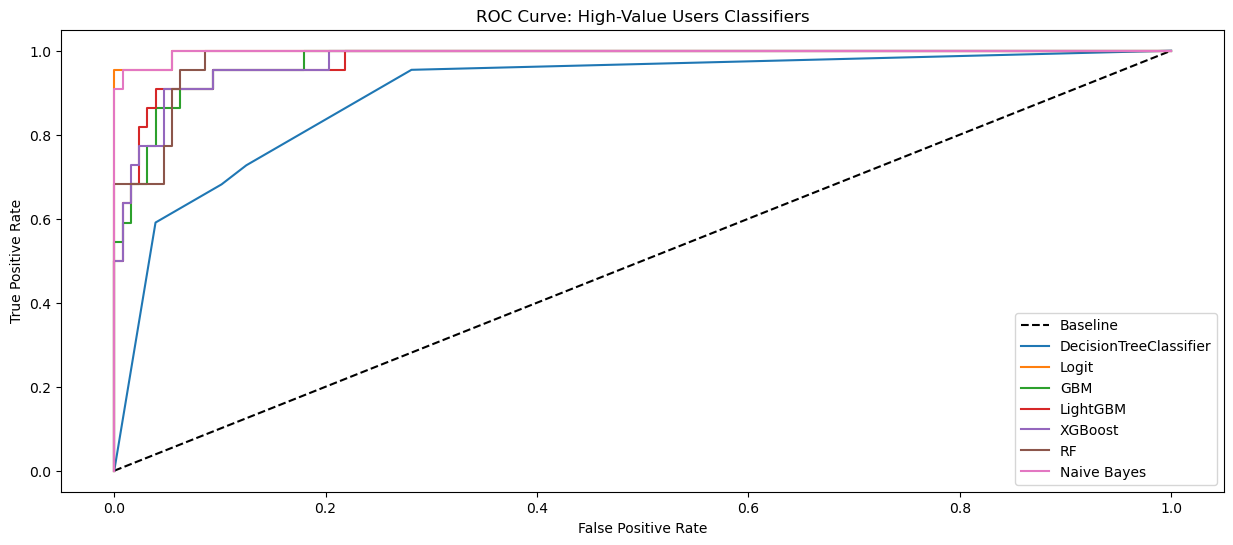

In [95]:
#Predicting proba
ytest_pred_prob1 = clf_model.predict_proba(X_test[:,:4])[:,1]
ytest_pred_prob2 = logit_model.predict_proba(X_test[:,:4])[:,1]
ytest_pred_prob3 = gbm_cmodel.predict_proba(X_test[:,:4])[:,1]
ytest_pred_prob4 = lgbm_cmodel.predict_proba(X_test[:,:4])[:,1]
ytest_pred_prob5 = xgb_cmodel.predict_proba(X_test[:,:4])[:,1]
ytest_pred_prob6 = rf_cmodel.predict_proba(X_test[:,:4])[:,1]
ytest_pred_prob7 = nb_cmodel.predict_proba(X_test[:,:4])[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_class_test, ytest_pred_prob1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_class_test, ytest_pred_prob2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_class_test, ytest_pred_prob3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_class_test, ytest_pred_prob4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_class_test, ytest_pred_prob5)
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_class_test, ytest_pred_prob6)
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_class_test, ytest_pred_prob7)

# Plot ROC curve
plt.figure(figsize = (15,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot(fpr4, tpr4)
plt.plot(fpr5, tpr5)
plt.plot(fpr6, tpr6)
plt.plot(fpr7, tpr7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: High-Value Users Classifiers')
plt.legend(['Baseline','DecisionTreeClassifier','Logit','GBM', 'LightGBM', 'XGBoost', 'RF','Naive Bayes'], loc='lower right')
plt.show()

                                  - - - - - - - - X X X X X X X X - - - - - - - - 